## Titanic Dataset - Kaggle Submission

You can view my Kaggle submissions [here](https://www.kaggle.com/kaledev).

### Initial Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data

In [2]:
#Import training data
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Cleanse Missing Data

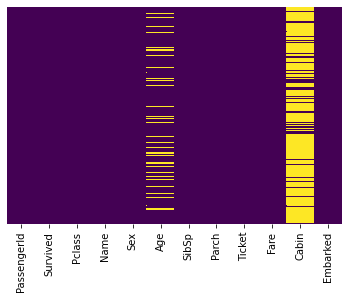

In [5]:
#We have some missing data here, so we're going to map out where NaN exists
#We might be able to take care of age, but cabin is probably too bad to save
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Age has some missing values, and one way we could fix the problem would be to fill in the average age. However - we *could* take this a step further and grab the average age by passenger class. This could provide us a slightly more accurate value given that it appears age follows a pattern across classes.

Now - let's take a quick look at the test dataset to see if we have the same issue.

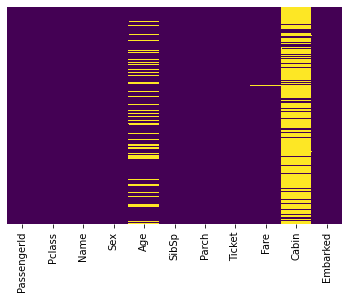

In [6]:
#Test dataset
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Same problem here with Test, except that we do see one NULL in the Fare. Similar to age - we could replace this with an average, possibly by Class since Fare will most definitely be affected by that. Now let's continue on with cleansing the Age.

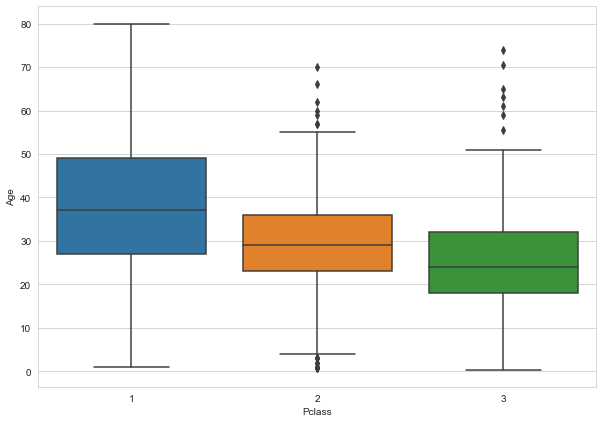

In [7]:
#Determine the average ages of passengers by class
#In an attempt to fix the NaN for this column somewhat
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df_train)

#### Fix Age and Cabin in Both Train/Test

In [8]:
#Fill out the Age column with the average ages of passengers per class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37 #Return the avg age of passengers in the 1st class
        elif Pclass == 2:
            return 29 #2nd class
        else:
            return 24 #3rd class
    else:
        return Age
    
#Apply the function to the Age column
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)

#Drop the cabin data
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

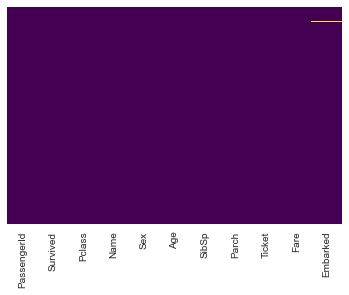

In [9]:
#Recheck the heatmap
#No more problems with Age
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

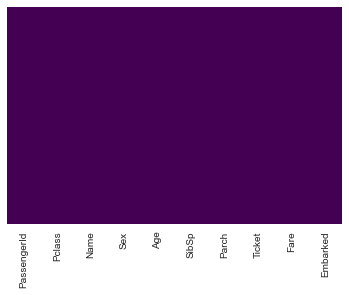

In [10]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This is a bit deceiving for Test - as we do still have a NaN Fare (as seen previously). We didn't fix this yet, it's just hidden a bit in this visualization.

#### Fix Fare in Test Dataset

In [11]:
df_test[df_test['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


To fix this - let's find the average fare for a 3rd class passenger.

In [12]:
df_test['Fare'][df_test['Pclass'] == 3].mean()

12.459677880184334

In [14]:
df_test['Fare'][df_test['PassengerId'] == 1044] = 12.45

#### Fix Embarked in Train Dataset

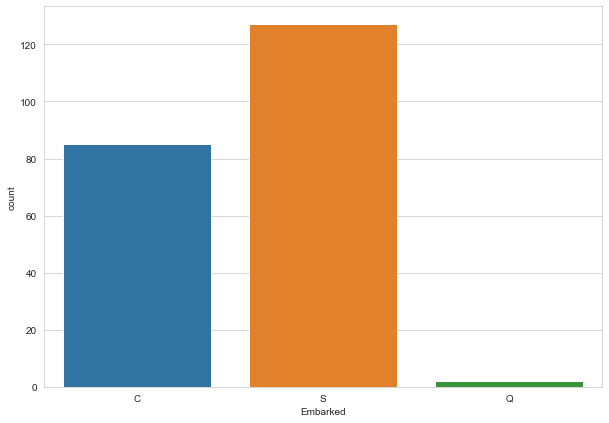

In [15]:
#Determine where most people in PClass = 1 embarked
#In an attempt to fix the NaN for this column somewhat
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(x="Embarked", data=df_train[df_train['Pclass'] == 1])

In [16]:
df_train[df_train['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Both of these rows are for customers inside of 1st class - so let's see where most of those passengers embarked from.

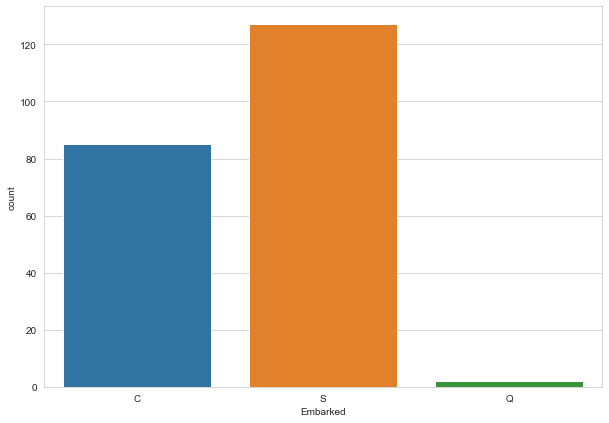

In [18]:
#Determine where most people in PClass = 1 embarked
#In an attempt to fix the NaN for this column somewhat
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(x="Embarked", data=df_train[df_train['Pclass'] == 1])

Since most are from 'S' - we'll make an executive decision here to set the others to 'S'

In [20]:
df_train['Embarked'][df_train['Embarked'].isnull() == True] = 'S'

In [21]:
df_train[df_train['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


All fixed!

### Other data cleansing, Parse down dataset

In [23]:
#Transform male/female into numeric columns - we drop female since M/F are perfect predictors
#Transform embarked into numeric columns Q/S
sex_train = pd.get_dummies(df_train['Sex'],drop_first=True)
embark_train = pd.get_dummies(df_train['Embarked'],drop_first=True)

#Repeat for test dataset
sex_test = pd.get_dummies(df_test['Sex'],drop_first=True)
embark_test = pd.get_dummies(df_test['Embarked'],drop_first=True)

In [24]:
#Add the new columns to the dataset
df_train = pd.concat([df_train,sex_train,embark_train],axis=1)
df_test = pd.concat([df_test,sex_test,embark_test],axis=1)

In [25]:
#Drop the old Sex/Embarked columns, along with the other columns we can't use for predictions
#Save passenger ID's for submission
pass_id = df_test['PassengerId']

df_train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_test.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


### Run Machine Learning Algorithm
To start with I'm going to split the training set to get an idea of accuracy. I'll be trying out Random Forests for my model.

In [28]:
#Assign variables
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#Choose the test size
#Test size = % of dataset allocated for testing (.3 = 30%)
#Random state = # of random splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
#Object, try out 200 estimators to start
rfc = RandomForestClassifier(n_estimators=200)

In [33]:
#Fit model
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
#Form predictions
predictions = rfc.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
#Print reports
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[130  24]
 [ 32  82]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       154
           1       0.77      0.72      0.75       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



Overall, it's a pretty good model - but it's still possible that we might be able to improve it a bit

### Try to improve with Randomized Searching (or Grid Searching)

Could have also utilized Grid Searching, but I wanted to try a large amount of parameters with low run-time.

In [37]:
#Imports
from sklearn.model_selection import RandomizedSearchCV

In [38]:
#Provide a dictionary of these values to test
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [39]:
#Instantiate object
grid = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [40]:
#Fit to find the best combo of params
grid.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [41]:
#Show the best params to use
grid.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [42]:
#New predictions
grid_predictions = grid.predict(X_test)

In [43]:
#Print reports
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[138  16]
 [ 32  82]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       154
           1       0.84      0.72      0.77       114

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



We actually did see a slight improvement here over the original model :-)

### Re-train on entire (un-split) training dataset

Now that we've gotten the "best" paramaters, we'll try to re-train utilizing the entire training dataset before we run final predictions.

Out of curiousity - I tried skipping this set and submitting without re-training on the full set, and I got a score of 0.76 from Kaggle (meaning 76% of predictions were correct). So let's see if this makes a big difference...

In [50]:
#Object, try out 200 estimators to start
rfc_full = RandomForestClassifier(n_estimators=2000,
                                  min_samples_split=2,
                                  min_samples_leaf=2,
                                  max_features='auto',
                                  max_depth=10,
                                  bootstrap=False)

#Fit model
rfc_full.fit(X,y)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       n_estimators=2000)

### Run finalized model on Test dataset

In [51]:
#Run on the test dataframe
full_predictions = rfc_full.predict(df_test)

In [52]:
full_predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
#Merge into final dataframe
pred_df = pd.DataFrame(full_predictions)

#Drop indexes (can cause NaN when using Concat if you don't do this beforehand)
pred_df.reset_index(drop=True, inplace=True)
pass_id.reset_index(drop=True, inplace=True)

submission = pd.concat([pass_id.iloc[0:],pred_df], axis=1)
submission.columns=['PassengerId','Survived']
submission.to_csv('submission.csv', index = False)

In [47]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Submitting this to Kaggle - things fall in line largely with the performance shown in the training dataset. I'm getting a score of 0.77751, meaning that I've predicted roughly 77-78% entries correctly. We could certainly continue on, testing and tuning different models to get improved performance

You can view my Kaggle submissions [here](https://www.kaggle.com/kaledev).